In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering

In [2]:
titanic_df=pd.read_csv('train.csv') 

In [3]:
columns_to_drop=['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Age']

In [4]:
titanic_df=titanic_df.drop(columns_to_drop, axis=1)

In [5]:
titanic_df.head(5)

,Pclass,Sex,SibSp,Parch,Fare
0,3,1,1,0,7.2500
1,1,2,1,0,71.2833
2,3,2,0,0,7.9250
3,1,2,1,0,53.1000
4,3,1,0,0,8.0500


In [6]:
titanic_df.describe()

,Pclass,Sex,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,1.352413,0.523008,0.381594,32.204208
std,0.836071,0.477990,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,7.910400
50%,3.000000,1.000000,0.000000,0.000000,14.454200
75%,3.000000,2.000000,1.000000,0.000000,31.000000
max,3.000000,2.000000,8.000000,6.000000,512.329200


<Axes: >

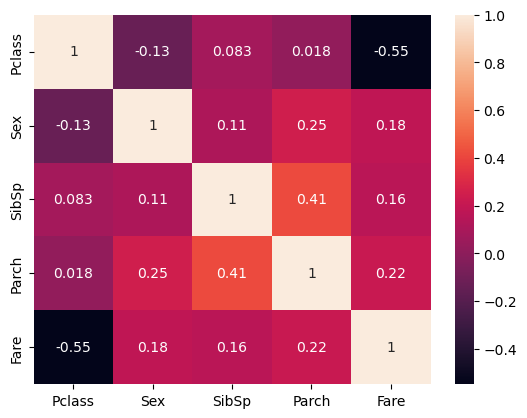

In [7]:
corr_matrix=titanic_df.corr()
sns.heatmap(corr_matrix,annot=True)

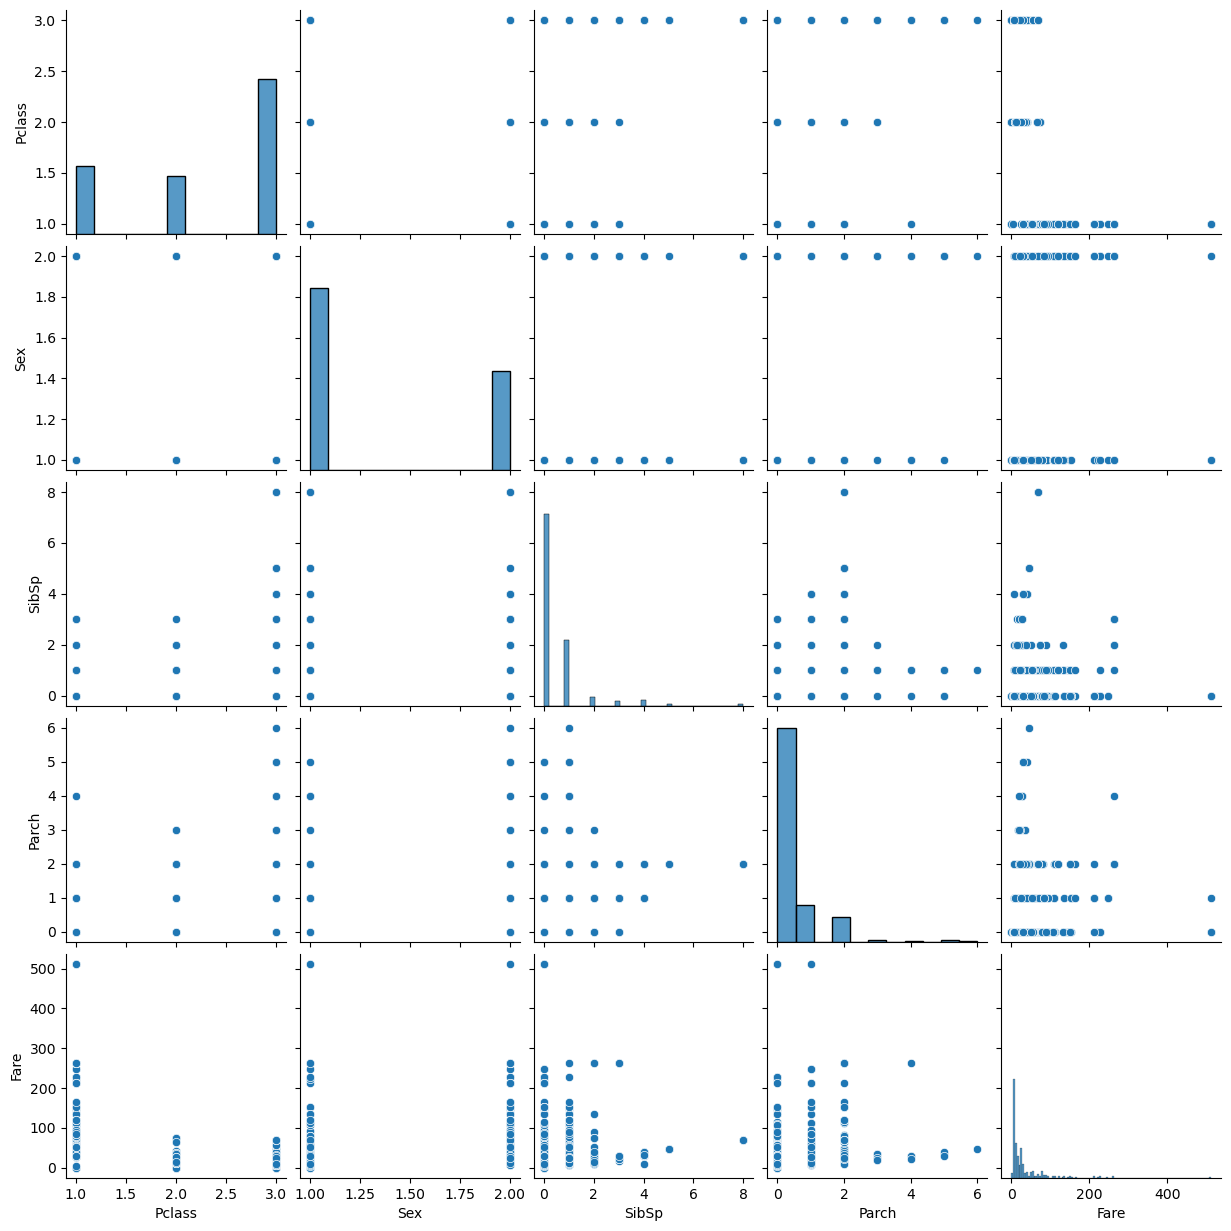

In [8]:
sns.pairplot(titanic_df)

In [9]:
#Scaling data to avoid biases 
scaling=StandardScaler()
scaled=scaling.fit_transform(titanic_df)

In [10]:
scaled_df=pd.DataFrame(scaled,columns=titanic_df.columns)
#print scaled dataset
scaled_df.head()

,Pclass,Sex,SibSp,Parch,Fare
0,0.827377,-0.737695,0.432793,-0.473674,-0.502445
1,-1.566107,1.355574,0.432793,-0.473674,0.786845
2,0.827377,1.355574,-0.474545,-0.473674,-0.488854
3,-1.566107,1.355574,0.432793,-0.473674,0.420730
4,0.827377,-0.737695,-0.474545,-0.473674,-0.486337


<Axes: >

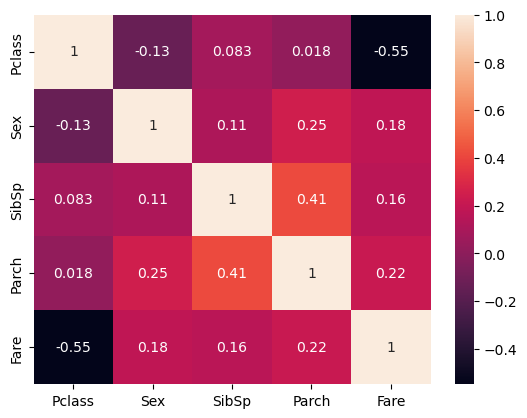

In [11]:
corr_matrix=titanic_df.corr()
sns.heatmap(corr_matrix,annot=True)

In [12]:
titanic_df.describe()

,Pclass,Sex,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,1.352413,0.523008,0.381594,32.204208
std,0.836071,0.477990,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,7.910400
50%,3.000000,1.000000,0.000000,0.000000,14.454200
75%,3.000000,2.000000,1.000000,0.000000,31.000000
max,3.000000,2.000000,8.000000,6.000000,512.329200


/home/student/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/student/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/student/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/student/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

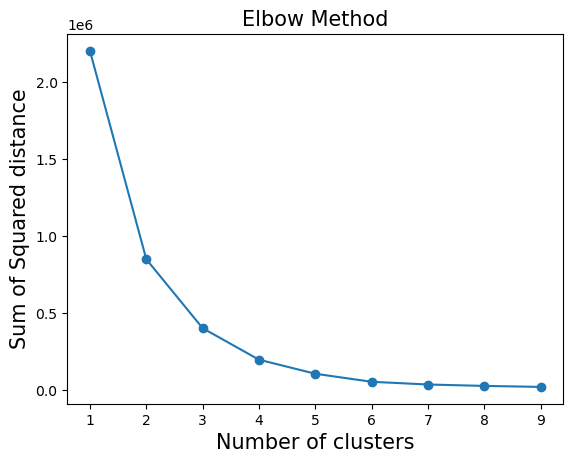

In [13]:
#plot elbow curve
a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(titanic_df)
    a.append(kmean.inertia_)
plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters', fontsize=15)
plt.ylabel('Sum of Squared distance', fontsize=15)
plt.show()

In [14]:
#choosing number of clusters as 2 and refitting kmeand model
kmeans = KMeans(n_clusters = 2, random_state = 111)
kmeans.fit(scaled_df)

/home/student/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=111)

In [15]:
#count number of records in every cluster
pd.Series(kmeans.labels_).value_counts()

1    626
0    265
dtype: int64

In [16]:
#calculate how good our model is
#calculate Silhoutte Coeffient for K=2

metrics.silhouette_score(scaled_df, kmeans.labels_)

0.39247607913801275

In [17]:
preds = kmeans.labels_ 
kmeans_df = pd.DataFrame(titanic_df)
kmeans_df['KMeans_Clusters'] = preds 
kmeans_df.head(10)

,Pclass,Sex,SibSp,Parch,Fare,KMeans_Clusters
0,3,1,1,0,7.2500,1
1,1,2,1,0,71.2833,0
2,3,2,0,0,7.9250,1
3,1,2,1,0,53.1000,0
4,3,1,0,0,8.0500,1
5,3,1,0,0,8.4583,1
6,1,1,0,0,51.8625,1
7,3,1,3,1,21.0750,0
8,3,2,0,2,11.1333,0
9,2,2,1,0,30.0708,0


preds = kmeans.labels_
kmeans_df = pd.DataFrame(titanic_df)
kmeans_df['KMeans_Clusters'] = preds
kmeans_df.head(10)

In [18]:
# save a kmeans file
kmeans_df.to_csv('kmeans_result.csv',index=False)

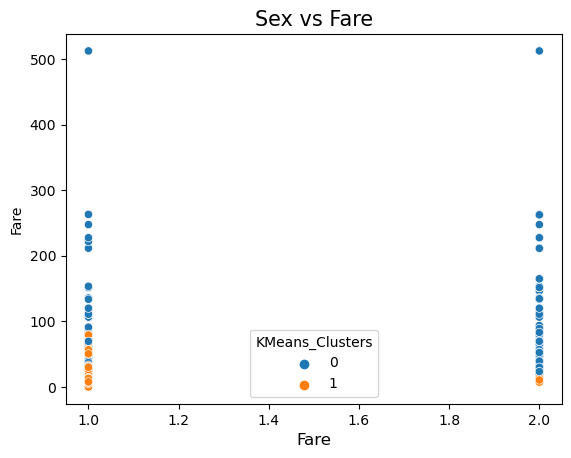

In [19]:
#visualization of clusters age and fare
sns.scatterplot(data=kmeans_df, x='Sex', y='Fare', hue='KMeans_Clusters')
plt.title('Sex vs Fare', fontsize=15)
plt.xlabel('Sex', fontsize=12)
plt.xlabel('Fare', fontsize=12)
plt.show()

In [20]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.
